In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

<Axes: xlabel='median_house_value', ylabel='Count'>

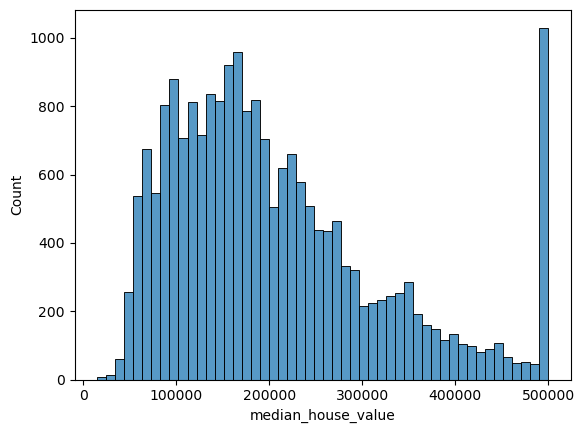

In [3]:
sns.histplot(df.median_house_value, bins=50)

In [4]:
df_new = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [5]:
df_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Question 1

In [6]:
df_new.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

## Question 2

In [7]:
df_new['population'].median()

1195.0

## Split Dataset

In [229]:
n = len(df_new)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [230]:
n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [231]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [232]:
df_train = df_new.iloc[idx[:n_train]]
df_val = df_new.iloc[idx[n_train:n_train+n_val]]
df_test = df_new.iloc[idx[n_train+n_val:]]

In [233]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [234]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [235]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [236]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

In [237]:
df_train.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [238]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [239]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [240]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

### Fill with 0

In [241]:
X_train = df_train[base].fillna(0)
X_val = df_val[base].fillna(0)
X_test = df_test[base].fillna(0)

In [242]:
w0, w = train_linear_regression(X_train, y_train)

In [243]:
y_pred = w0 + X_val.dot(w)

<Axes: ylabel='Count'>

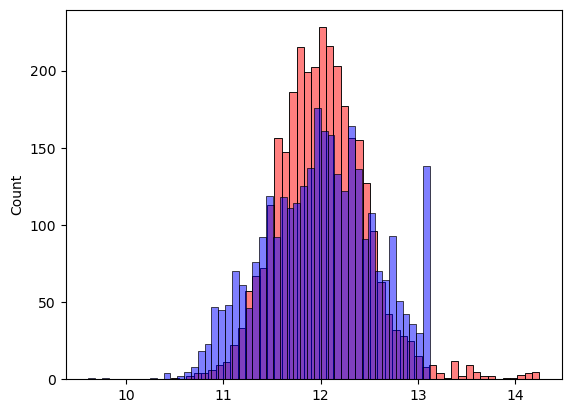

In [244]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [245]:
round(rmse(y_val, y_pred),2)

0.34

### Fill with Mean

In [246]:
mean = df_train['total_bedrooms'].mean()

In [247]:
X_train = df_train[base].fillna(mean)
X_val = df_val[base].fillna(mean)
X_test = df_test[base].fillna(mean)

In [248]:
w0, w = train_linear_regression(X_train, y_train)

In [249]:
y_pred = w0 + X_val.dot(w)

<Axes: ylabel='Count'>

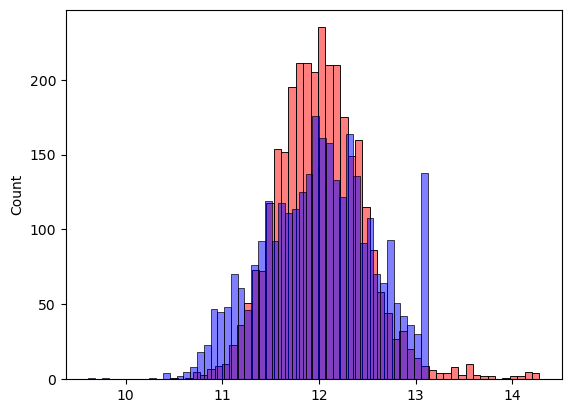

In [250]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [251]:
round(rmse(y_val, y_pred),2)

0.34

## Question 4

In [252]:
X_train = df_train[base].fillna(0)
X_val = df_val[base].fillna(0)
X_test = df_test[base].fillna(0)

In [253]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [254]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [255]:
for r in r_list:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val.dot(w)
    print("r:",r, " rmse:", round(rmse(y_val, y_pred),2))

r: 0  rmse: 0.34
r: 1e-06  rmse: 0.34
r: 0.0001  rmse: 0.34
r: 0.001  rmse: 0.34
r: 0.01  rmse: 0.34
r: 0.1  rmse: 0.34
r: 1  rmse: 0.34
r: 5  rmse: 0.35
r: 10  rmse: 0.35


### Question 5

In [256]:
n = len(df_new)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [257]:
n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [258]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [259]:
rmse_list = []

In [260]:
for seed in seed_list:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df_new.iloc[idx[:n_train]]
    df_val = df_new.iloc[idx[n_train:n_train+n_val]]
    df_test = df_new.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    X_train = df_train[base].fillna(0)
    X_val = df_val[base].fillna(0)
    X_test = df_test[base].fillna(0)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_list.append(rmse(y_val,y_pred))

In [261]:
std = np.std(rmse_list)
round(std, 3)

0.005

## Question 6

In [262]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df_new.iloc[idx[:n_train]]
df_val = df_new.iloc[idx[n_train:n_train+n_val]]
df_test = df_new.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
X_train = df_train[base].fillna(0)
X_val = df_val[base].fillna(0)
X_test = df_test[base].fillna(0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w0 + X_test.dot(w)
print("rmse:", round(rmse(y_test, y_pred),2))

rmse: 0.33
